# Descarga y descripción de activos financieros

Pandas es una librería muy popular entre los desarrolladores de Python, y sobre todo dentro del ámbito de Data Science y Machine Learning, ya que ofrece unas estructuras muy poderosas y flexibles que facilitan la manipulación y tratamiento de datos.

* Puedes encontrar la documentación de pandas [aquí](https://pandas.pydata.org/docs/index.html)
* En particular puedes ver unos tutoriales interesantes [aquí](https://pandas.pydata.org/docs/getting_started/intro_tutorials/index.html)

## 1. Lectura de datos

### Desde Excel y CSV

Supongamos que tenemos datos que provienen de dos **fuentes de datos distintas**, una en formato **Excel** y otra en formato **CSV**. Queremos leer ambos ficheros y unirlos con el objetivo de tener un único conjunto de datos.

<img src="../imgs/data_02 - Parte 1.png">

#### Formato Excel

In [3]:
import pandas as pd

data1 = pd.read_excel("../data/data_02 - Parte 1.xlsx")
data1

,Date,AAPL.O,MSFT.O
0,2010-01-01,NaN,NaN
1,2010-01-04,30.572827,30.950
2,2010-01-05,30.625684,30.960
3,2010-01-06,30.138541,30.770
4,2010-01-07,30.082827,30.452
...,...,...,...
2211,2018-06-25,182.170000,98.390
2212,2018-06-26,184.430000,99.080
2213,2018-06-27,184.160000,97.540
2214,2018-06-28,185.500000,98.630


Las estructuras que se utilizan en Pandas son:
* **DataFrame**: matriz bidimensional formado por series concatenadas en forma de filas y columnas. Cada una de las columnas es una serie
* **Series**: vector columna o matriz unidimensional que permite almacenar todo tipo de datos con un índice.
<center>
<img src="../imgs/series+pandas.png"  alt="drawing" width="40%"/>
</center>



En nuestro caso, la información se ha guardado en el dataframe llamado `data1`. Mientras que `Date`, `AAPL.O` y `MSFTO.O` son series.


<img src="../imgs/Estructura Pandas.png">


Para poder utilizar la librería, primero hay que instalarla:

- conda install -c anaconda pandas  as pd        ##### Si usas anaconda

- pip install pandas as pd

Una vez cargado, lo primero es ver la información general del dataframe:

In [4]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2216 entries, 0 to 2215
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    2216 non-null   datetime64[ns]
 1   AAPL.O  2138 non-null   float64       
 2   MSFT.O  2138 non-null   float64       
dtypes: datetime64[ns](1), float64(2)
memory usage: 52.1 KB


Ahora vamos a ser un poco más específicos a la hora de indicar a Pandas cómo debe leer el fichero Excel. Indicaremos desde qué hoja queremos leer los datos y qué columna queremos que actúe como índice de los datos `index_col="Date"`.

In [5]:
data1 = pd.read_excel("../data/data_02 - Parte 1.xlsx", sheet_name="Datos", index_col="Date")
data1

,AAPL.O,MSFT.O
Date,,
2010-01-01,NaN,NaN
2010-01-04,30.572827,30.950
2010-01-05,30.625684,30.960
2010-01-06,30.138541,30.770
2010-01-07,30.082827,30.452
...,...,...
2018-06-25,182.170000,98.390
2018-06-26,184.430000,99.080
2018-06-27,184.160000,97.540


Se puede observar que, en este caso, el index ya es una fecha (formato DatetimeIndex)

In [6]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2216 entries, 2010-01-01 to 2018-06-29
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AAPL.O  2138 non-null   float64
 1   MSFT.O  2138 non-null   float64
dtypes: float64(2)
memory usage: 51.9 KB


Podemos saber de qué tipo es un objeto usando el método `type`.

In [7]:
type(data1)

pandas.core.frame.DataFrame

Podemos saber cuál es el índice de DataFrame consultando su propiedad `index`.

In [8]:
data1.index

DatetimeIndex(['2010-01-01', '2010-01-04', '2010-01-05', '2010-01-06',
               '2010-01-07', '2010-01-08', '2010-01-11', '2010-01-12',
               '2010-01-13', '2010-01-14',
               ...
               '2018-06-18', '2018-06-19', '2018-06-20', '2018-06-21',
               '2018-06-22', '2018-06-25', '2018-06-26', '2018-06-27',
               '2018-06-28', '2018-06-29'],
              dtype='datetime64[ns]', name='Date', length=2216, freq=None)

#### Formato CSV

In [9]:
data2 = pd.read_csv("../data/data_02 - Parte 2.csv", index_col="Date")
data2

,SPY,GLD
Date,,
2010-01-01,NaN,NaN
2010-01-04,113.33,109.80
2010-01-05,113.63,109.70
2010-01-06,113.71,111.51
2010-01-07,114.19,110.82
...,...,...
2018-06-25,271.00,119.89
2018-06-26,271.60,119.26
2018-06-27,269.35,118.58


Ahora tenemos los datos en dos dataframes separados `data1` y `data2`. Para poder unirlos en un único dataframe, usamos **pd.concat()**.

Vamos a ver cómo funciona con unos ejemplos:

#### EJEMPLO 1:

<div style="display: flex; align-items: center;">
    <!-- Asignar un ancho fijo a la imagen -->
    <div style="width: 35%;">
        <img src="../imgs/merging_concat_basic.png" alt="drawing" style="width: 100%;"/>
    </div>
    <!-- El texto ocupará el resto del espacio -->
    <div style="flex-grow: 1; padding-left: 10px;">
        <strong>¿Qué hace `pd.concat()`?</strong>
        <ul>
            <li><strong>Columnas iguales, filas diferentes:</strong> `pd.concat()` une DataFrames con las mismas columnas pero distintas filas.</li>
            <li><strong>Resultado:</strong> Devuelve un DataFrame que contiene todas las filas y columnas de los DataFrames originales.</li>
        </ul>
    </div>
</div>

#### EJEMPLO 2:

<center>
<img src="../imgs/merging_concat_axis1.png"  alt="drawing" width="40%"/>
</center>

<strong>¿Qué hace `pd.concat()` cuando los DataFrames tienen columnas y filas comunes y no comunes?</strong>
<ul>
    <li><strong>Columnas y filas comunes y no comunes:</strong> Los DataFrames que se combinan pueden tener algunas columnas y filas en común, y otras que no coinciden.</li>
    <li><strong>Resultado:</strong> `pd.concat()` crea un nuevo DataFrame que incluye todas las columnas y filas de ambos DataFrames. Cuando una columna o fila coincide entre los DataFrames, se combinan los datos disponibles. Si alguna columna o fila no tiene datos en uno de los DataFrames, se rellena con `NaN` en esas posiciones.</li>
</ul>

#### EJEMPLO 3:

<center>
<img src="../imgs/merging_concat_axis1_inner.png"  alt="drawing" width="40%"/>
</center>

<strong>¿Qué hace `pd.concat()` con `join="inner"` y `axis=1`?</strong>
<ul>
    <li><strong>Filas comunes:</strong> Solo se mantienen las filas que existen en ambos DataFrames.</li>
    <li><strong>Resultado:</strong> El DataFrame final incluye solo las columnas y filas donde hay datos en ambos DataFrames.</li>
</ul>

**EN NUESTRO CASO** La siguiente instrucción va a funcionar mal, o mejor dicho, *de forma distinta a la esperada* ¿Qué ha sucedido? ¿Por qué se ha comportado así la función `concat`?

In [10]:
data = pd.concat([data1, data2], axis=0)
data

,AAPL.O,MSFT.O,SPY,GLD
Date,,,,
2010-01-01 00:00:00,NaN,NaN,NaN,NaN
2010-01-04 00:00:00,30.572827,30.950,NaN,NaN
2010-01-05 00:00:00,30.625684,30.960,NaN,NaN
2010-01-06 00:00:00,30.138541,30.770,NaN,NaN
2010-01-07 00:00:00,30.082827,30.452,NaN,NaN
...,...,...,...,...
2018-06-25,NaN,NaN,271.00,119.89
2018-06-26,NaN,NaN,271.60,119.26
2018-06-27,NaN,NaN,269.35,118.58


In [11]:
data1.index

DatetimeIndex(['2010-01-01', '2010-01-04', '2010-01-05', '2010-01-06',
               '2010-01-07', '2010-01-08', '2010-01-11', '2010-01-12',
               '2010-01-13', '2010-01-14',
               ...
               '2018-06-18', '2018-06-19', '2018-06-20', '2018-06-21',
               '2018-06-22', '2018-06-25', '2018-06-26', '2018-06-27',
               '2018-06-28', '2018-06-29'],
              dtype='datetime64[ns]', name='Date', length=2216, freq=None)

In [12]:
data2.index

Index(['2010-01-01', '2010-01-04', '2010-01-05', '2010-01-06', '2010-01-07',
       '2010-01-08', '2010-01-11', '2010-01-12', '2010-01-13', '2010-01-14',
       ...
       '2018-06-18', '2018-06-19', '2018-06-20', '2018-06-21', '2018-06-22',
       '2018-06-25', '2018-06-26', '2018-06-27', '2018-06-28', '2018-06-29'],
      dtype='object', name='Date', length=2216)

Si ahora especificamos no solo qué columna queremos como índice, sino también que Pandas convierta automáticamente las cadenas que parezcan una fecha en un tipo fecha...

In [13]:
# data2 = pd.read_csv("../data/data_02 - Parte 2.csv", index_col="Date", parse_dates=["Date"])
data2 = pd.read_csv("../data/data_02 - Parte 2.csv", index_col="Date", parse_dates=True)
data2

,SPY,GLD
Date,,
2010-01-01,NaN,NaN
2010-01-04,113.33,109.80
2010-01-05,113.63,109.70
2010-01-06,113.71,111.51
2010-01-07,114.19,110.82
...,...,...
2018-06-25,271.00,119.89
2018-06-26,271.60,119.26
2018-06-27,269.35,118.58


In [14]:
data2.index

DatetimeIndex(['2010-01-01', '2010-01-04', '2010-01-05', '2010-01-06',
               '2010-01-07', '2010-01-08', '2010-01-11', '2010-01-12',
               '2010-01-13', '2010-01-14',
               ...
               '2018-06-18', '2018-06-19', '2018-06-20', '2018-06-21',
               '2018-06-22', '2018-06-25', '2018-06-26', '2018-06-27',
               '2018-06-28', '2018-06-29'],
              dtype='datetime64[ns]', name='Date', length=2216, freq=None)

Y ahora unimos los dos DataFrames por columnas.

In [15]:
data = pd.concat([data1, data2], axis=1, join="inner", ignore_index=False)
data

,AAPL.O,MSFT.O,SPY,GLD
Date,,,,
2010-01-01,NaN,NaN,NaN,NaN
2010-01-04,30.572827,30.950,113.33,109.80
2010-01-05,30.625684,30.960,113.63,109.70
2010-01-06,30.138541,30.770,113.71,111.51
2010-01-07,30.082827,30.452,114.19,110.82
...,...,...,...,...
2018-06-25,182.170000,98.390,271.00,119.89
2018-06-26,184.430000,99.080,271.60,119.26
2018-06-27,184.160000,97.540,269.35,118.58


## 2. Slicing

*Slicing* es la técnica que utilizamos para seleccionar y filtrar datos de un *DataFrame* o *Series*.

In [16]:
# Consultamos las columnas que tiene nuestro DataFrame.
data.columns

Index(['AAPL.O', 'MSFT.O', 'SPY', 'GLD'], dtype='object')

In [17]:
# Seleccionamos la serie de datos que tiene por nombre de columna "AAPL.O".
data["AAPL.O"]

Date
2010-01-01           NaN
2010-01-04     30.572827
2010-01-05     30.625684
2010-01-06     30.138541
2010-01-07     30.082827
                 ...    
2018-06-25    182.170000
2018-06-26    184.430000
2018-06-27    184.160000
2018-06-28    185.500000
2018-06-29    185.110000
Name: AAPL.O, Length: 2216, dtype: float64

In [18]:
# Seleccionamos la serie de datos que tiene por nombre de columna "AAPL.O" y luego seleccionamos el valor que tiene en la fecha "2010-01-06".
data["AAPL.O"]["2010-01-06"]

30.13854129

Para extraer información de un ``DataFrame`` usaremos muy habitualmente las funciones ``loc`` e ``iloc``:
* ``loc``: nos permite hacer *slicing* utilizando los valores del índice y/o las columnas.
* ``iloc``: nos permite hacer *slicing* utilizand las posiciones en el índice y/o las columnas.

In [19]:
# Selecciona todas las filas y solo la columna "AAPL.O".
data.loc[:, "AAPL.O"]

Date
2010-01-01           NaN
2010-01-04     30.572827
2010-01-05     30.625684
2010-01-06     30.138541
2010-01-07     30.082827
                 ...    
2018-06-25    182.170000
2018-06-26    184.430000
2018-06-27    184.160000
2018-06-28    185.500000
2018-06-29    185.110000
Name: AAPL.O, Length: 2216, dtype: float64

In [20]:
# Selecciona todas las filas y solo la columna en la posición 0.
data.iloc[:, 0]

Date
2010-01-01           NaN
2010-01-04     30.572827
2010-01-05     30.625684
2010-01-06     30.138541
2010-01-07     30.082827
                 ...    
2018-06-25    182.170000
2018-06-26    184.430000
2018-06-27    184.160000
2018-06-28    185.500000
2018-06-29    185.110000
Name: AAPL.O, Length: 2216, dtype: float64

In [21]:
# Selecciona la fila con fecha "2018-06-25" y las columnas "AAPL.O" y "MSFT.O".
data.loc["2018-06-25", ["AAPL.O", "MSFT.O"]]

AAPL.O    182.17
MSFT.O     98.39
Name: 2018-06-25 00:00:00, dtype: float64

In [22]:
# Selecciona las filas con fechas entre "2018-05" y "2018-06-10" y las columnas "AAPL.O" y "MSFT.O".
data.loc["2018-05":"2018-06-10", ["AAPL.O", "MSFT.O"]]

,AAPL.O,MSFT.O
Date,,
2018-05-01,169.10,95.00
2018-05-02,176.57,93.51
2018-05-03,176.89,94.07
2018-05-04,183.83,95.16
2018-05-07,185.16,96.22
2018-05-08,186.05,95.81
2018-05-09,187.36,96.94
2018-05-10,190.04,97.91
2018-05-11,188.59,97.70


In [23]:
# Selecciona las 5 primeras filas.
data.iloc[:5]

,AAPL.O,MSFT.O,SPY,GLD
Date,,,,
2010-01-01,NaN,NaN,NaN,NaN
2010-01-04,30.572827,30.950,113.33,109.80
2010-01-05,30.625684,30.960,113.63,109.70
2010-01-06,30.138541,30.770,113.71,111.51
2010-01-07,30.082827,30.452,114.19,110.82


## 3. Inspección de los datos

In [24]:
data = pd.read_csv("../data/data_01.csv", index_col="Date", parse_dates=True)
data

,AAPL,GLD,MSFT,SPY
Date,,,,
2019-07-01,48.628834,NaN,129.397415,NaN
2019-07-02,48.913532,NaN,130.255753,NaN
2019-07-03,49.318890,NaN,131.095001,NaN
2019-07-05,49.275448,NaN,130.713547,NaN
2019-07-08,48.259693,NaN,130.618149,NaN
...,...,...,...,...
2024-06-24,NaN,215.630005,447.670013,NaN
2024-06-25,NaN,214.559998,450.950012,NaN
2024-06-26,NaN,212.580002,452.160004,NaN


Obtener información de los datos que contiene el DataFrame con ``info`` y ``describe``.
* ``info``: nos da información sobre los tipos y el rango de valores del índice y sobre el tipo y valores nulos de las columnas.
* ``describe``: nos da información estadística básica de las columnas numéricas.

In [25]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1258 entries, 2019-07-01 to 2024-06-28
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AAPL    1212 non-null   float64
 1   GLD     1198 non-null   float64
 2   MSFT    1216 non-null   float64
 3   SPY     1079 non-null   float64
dtypes: float64(4)
memory usage: 49.1 KB


In [26]:
data.describe()

,AAPL,GLD,MSFT,SPY
count,1212.000000,1198.000000,1216.000000,1079.000000
mean,134.902860,171.328430,262.279147,380.759461
std,41.409409,17.497325,80.092659,58.007944
min,46.647964,133.210007,126.088112,209.257523
25%,113.291052,162.355003,206.069595,342.927185
50%,143.507835,170.485001,255.302002,393.155823
75%,169.450161,180.647495,318.535294,425.431168
max,214.240005,224.559998,452.850006,498.040863


Examinar datos nulos

<Axes: >

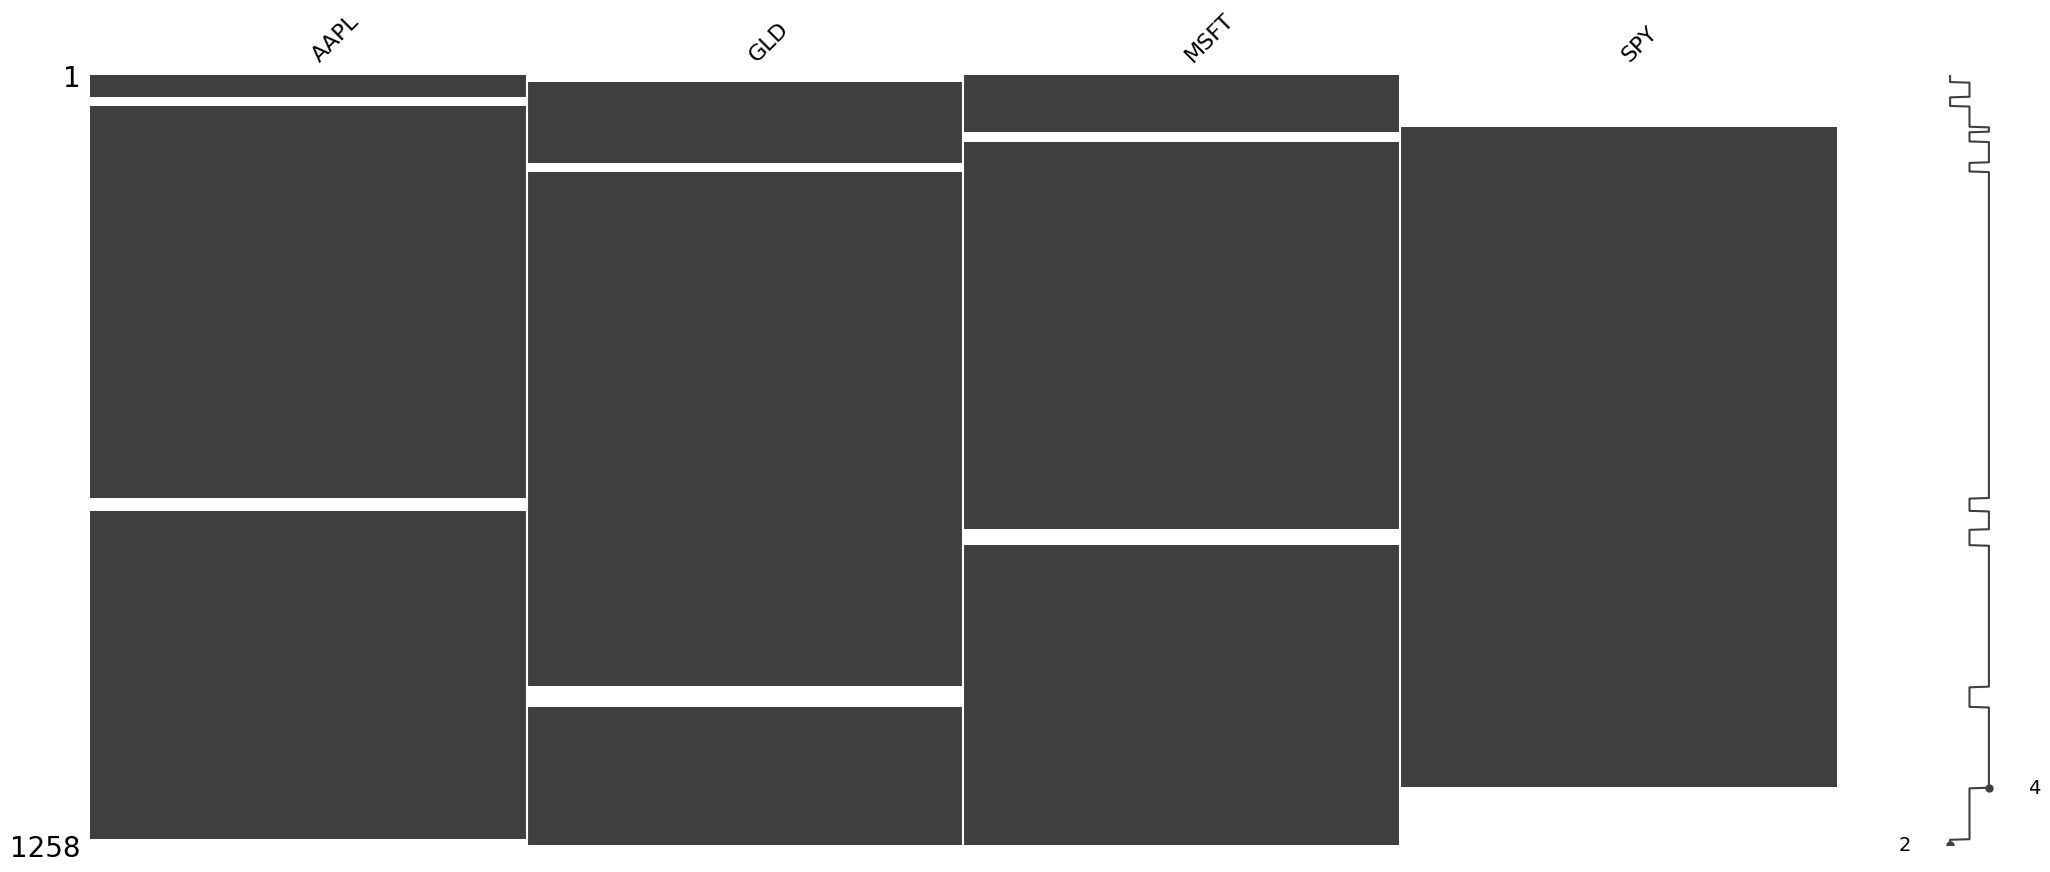

In [27]:
import missingno as mso

mso.matrix(data)

In [28]:
# Contamos el número de nulos en cada columna.
data.isnull().sum()

AAPL     46
GLD      60
MSFT     42
SPY     179
dtype: int64

## EJERCICIO: Análisis inicial de Series de Precios de Activos Financieros:

1- **Descarga de Datos**:

    Descarga los archivos de precios históricos de tres activos financieros diferentes (AAPL.xlsx, MSFT.xlsx y CSCO.csv).

2- **Concatenación de datos**

    Selecciona únicamente la columna Cierre Ajustado de cada DataFrame, renombrándolas para que representen el ticker de cada activo (AAPL, MSFT, y CSCO).

    Junta todos en un único dataframe

3- **Inspección Inicial**:

    Muestra las primeras 10 filas del DataFrame resultante para revisar la estructura y contenido de los datos.

    Identifica las columnas que contienen valores nulos y muestra el número total de valores nulos por columna.

4- **Slicing de datos**:

    Realiza un slicing para seleccionar solo las filas correspondientes al año 2024.

    Crea una nueva tabla que contenga los datos de precios de cierre de los activos seleccionados para las primeras 60 observaciones de 2024.

5- **Análisis Exploratorio Básico**:

    Calcula el número de días en los que los precios de cierre estuvieron disponibles para cada activo en 2024.

    Calcula la media de los precios de cierre para cada activo durante el año 2024, ignorando los valores nulos.

6- **Exportación de Datos**:

    Guarda el DataFrame final en un nuevo archivo CSV llamado precios_consolidados_2024.csv.


1- **Descarga de Datos**:

    Descarga los archivos de precios históricos de tres activos financieros diferentes (AAPL.xlsx, MSFT.xlsx y CSCO.csv).

In [29]:
# 1. Cargar los datos desde los archivos en el directorio '../data' y establecer la columna 'Date' como índice
df_aapl = pd.read_excel('../data/AAPL.xlsx', index_col='Date', parse_dates=True)
df_msft = pd.read_excel('../data/MSFT.xlsx', index_col='Date', parse_dates=True)
df_csco = pd.read_csv('../data/CSCO.csv', index_col='Date', parse_dates=True)

2- **Concatenación de datos**

    Selecciona únicamente la columna Cierre Ajustado de cada DataFrame, renombrándolas para que representen el ticker de cada activo (AAPL, MSFT, y CSCO).

    Junta todos en un único dataframe

In [30]:
# 2. Seleccionar solo la columna 'Adj Close' de cada DataFrame y renombrarla con el nombre de la empresa correspondiente
df_aapl = df_aapl[['Adj Close']]
df_aapl = df_aapl.rename(columns={'Adj Close': 'AAPL'})

df_msft = df_msft[['Adj Close']]
df_msft = df_msft.rename(columns={'Adj Close': 'MSFT'})

df_csco = df_csco[['Adj Close']]
df_csco = df_csco.rename(columns={'Adj Close': 'CSCO'})


In [31]:
# Concatenar los DataFrames a lo largo de las columnas
df_concatenado = pd.concat([df_aapl, df_msft, df_csco], axis=1)

3- **Inspección Inicial**:

    Muestra las primeras 10 filas del DataFrame resultante para revisar la estructura y contenido de los datos.

    Identifica las columnas que contienen valores nulos y muestra el número total de valores nulos por columna.

In [32]:
# Verificar la concatenación
df_concatenado.head(10)

,AAPL,MSFT,CSCO
Date,,,
2022-01-03,179.273590,NaN,NaN
2022-01-04,176.998337,NaN,NaN
2022-01-05,172.290207,NaN,NaN
2022-01-06,169.414108,NaN,NaN
2022-01-07,169.581543,NaN,NaN
2022-01-10,169.601257,NaN,NaN
2022-01-11,172.447815,NaN,NaN
2022-01-12,172.891037,NaN,NaN
2022-01-13,169.601257,NaN,NaN


In [33]:
df_concatenado.isnull().sum()

AAPL      0
MSFT    251
CSCO    156
dtype: int64

In [34]:
df_concatenado.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 678 entries, 2022-01-03 to 2024-09-13
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AAPL    678 non-null    float64
 1   MSFT    427 non-null    float64
 2   CSCO    522 non-null    float64
dtypes: float64(3)
memory usage: 21.2 KB


4- **Slicing de datos**:

    Realiza un slicing para seleccionar solo las filas correspondientes al año 2024.

    Crea una nueva tabla que contenga los datos de precios de cierre de los activos seleccionados para las primeras 60 observaciones de 2024.

In [35]:
df_2024 = df_concatenado.loc['2024']

In [36]:
df_60 = df_concatenado.loc['2024'].iloc[0:60, :]

5- **Análisis Exploratorio Básico**:

    Calcula el número de días en los que los precios de cierre estuvieron disponibles para cada activo en 2024.

    Calcula la media de los precios de cierre para cada activo durante el año 2024, ignorando los valores nulos.

In [37]:
df_2024.info() # Número de días con valores de cierre

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 177 entries, 2024-01-02 to 2024-09-13
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AAPL    177 non-null    float64
 1   MSFT    177 non-null    float64
 2   CSCO    124 non-null    float64
dtypes: float64(3)
memory usage: 5.5 KB


In [38]:
df_2024.mean(skipna=True) # Valor promedio de cierre sin tener en cuenta los valores nulos

AAPL    195.430356
MSFT    416.357165
CSCO     48.046718
dtype: float64

In [39]:
df_2024.describe()

,AAPL,MSFT,CSCO
count,177.000000,177.000000,124.000000
mean,195.430356,416.357165,48.046718
std,21.081554,19.556515,1.465662
min,164.585999,365.751038,45.133335
25%,180.296478,405.097839,47.024632
50%,189.620514,414.005676,48.065247
75%,217.708008,424.746948,49.156325
max,234.548523,466.718781,51.465023


## 4. Limpieza de datos

¿Qué podemos hacer ahora?
* Eliminar las filas que no contienen datos.
* Rellenar los datos faltantes.
* Remuestrear los datos a una frecuencia menor.
* Obtener los datos desde una fuente de datos más fiable.

In [40]:
# Recordemos el contenido de nuestro DataFrame

data.head()

,AAPL,GLD,MSFT,SPY
Date,,,,
2019-07-01,48.628834,NaN,129.397415,NaN
2019-07-02,48.913532,NaN,130.255753,NaN
2019-07-03,49.318890,NaN,131.095001,NaN
2019-07-05,49.275448,NaN,130.713547,NaN
2019-07-08,48.259693,NaN,130.618149,NaN


Eliminar las filas que no contienen datos

In [41]:
# Eliminamos las columnas que tengan al menos un valor nulo.
data.dropna(how="any", axis=1)

""
Date
2019-07-01
2019-07-02
2019-07-03
2019-07-05
2019-07-08
...
2024-06-24
2024-06-25
2024-06-26


<Axes: >

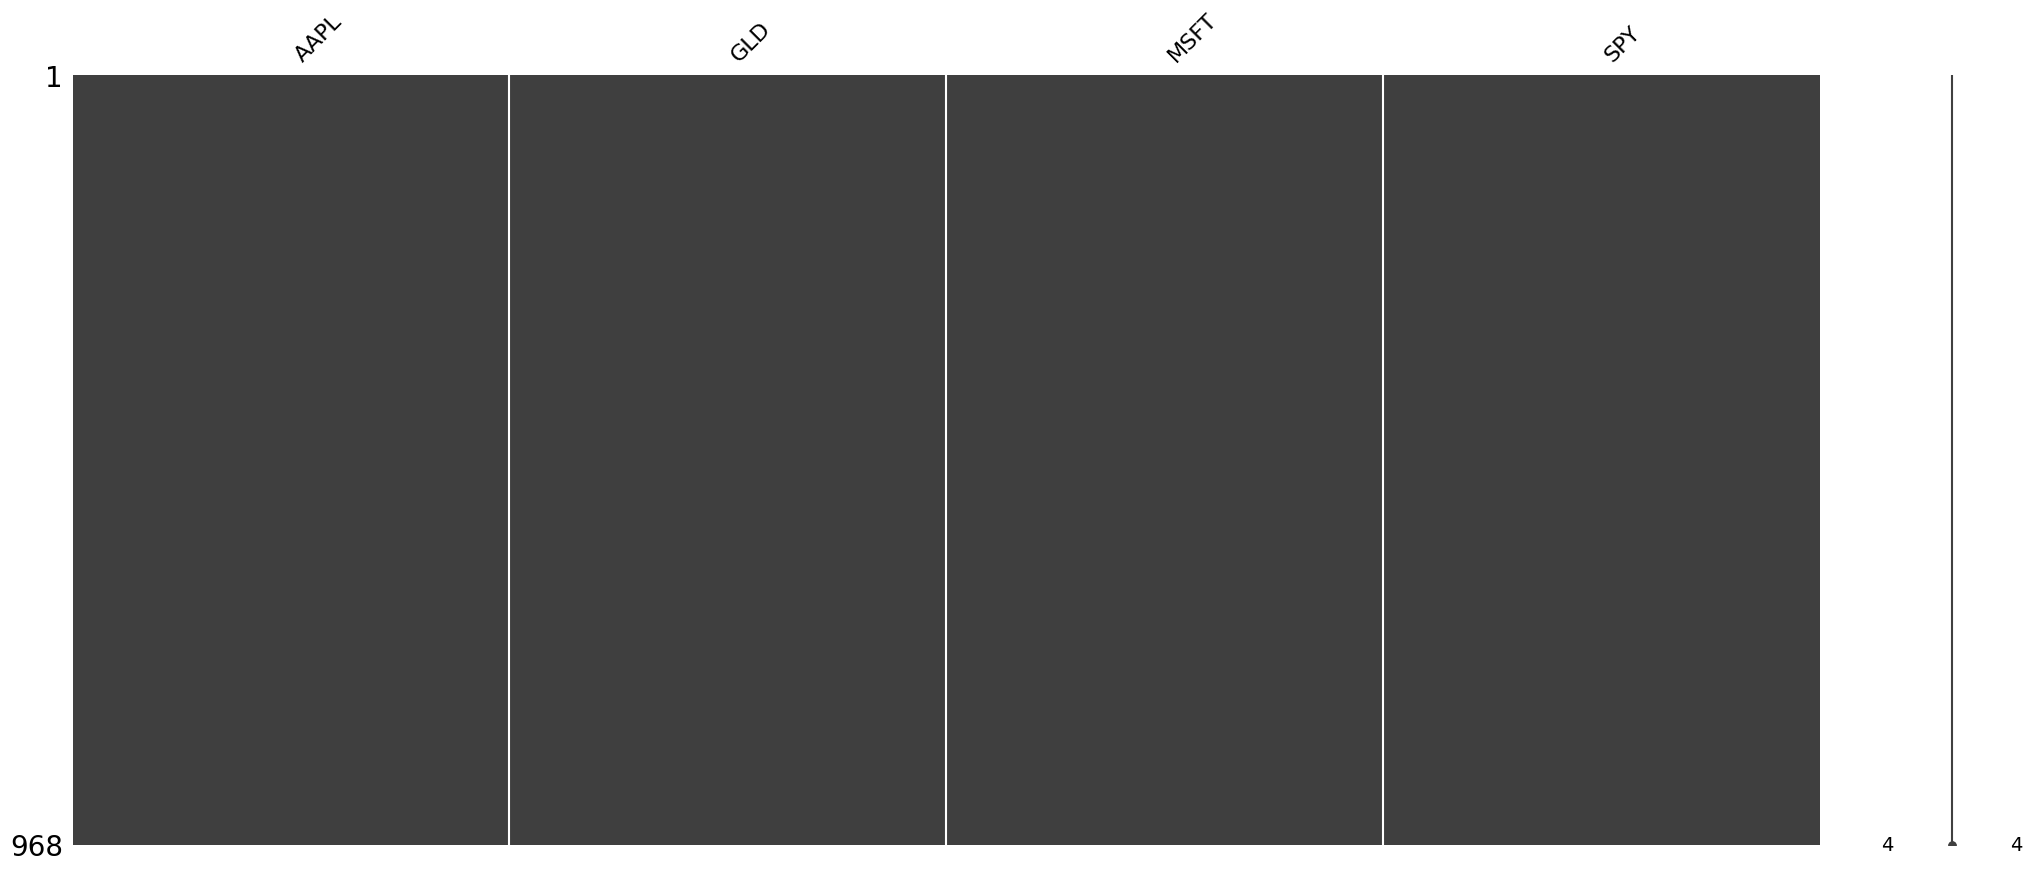

In [42]:
# Eliminamos las filas que tengan al menos un valor nulo.
mso.matrix(data.dropna(how="any", axis=0))

Rellenar datos faltantes.

**Cuidado con rellenar datos... depende del caso de uso en el que se está trabajando.**

In [43]:
data

,AAPL,GLD,MSFT,SPY
Date,,,,
2019-07-01,48.628834,NaN,129.397415,NaN
2019-07-02,48.913532,NaN,130.255753,NaN
2019-07-03,49.318890,NaN,131.095001,NaN
2019-07-05,49.275448,NaN,130.713547,NaN
2019-07-08,48.259693,NaN,130.618149,NaN
...,...,...,...,...
2024-06-24,NaN,215.630005,447.670013,NaN
2024-06-25,NaN,214.559998,450.950012,NaN
2024-06-26,NaN,212.580002,452.160004,NaN


In [44]:
# Rellena los NaN de cada columna con un cero.
data.fillna(0)

,AAPL,GLD,MSFT,SPY
Date,,,,
2019-07-01,48.628834,0.000000,129.397415,0.0
2019-07-02,48.913532,0.000000,130.255753,0.0
2019-07-03,49.318890,0.000000,131.095001,0.0
2019-07-05,49.275448,0.000000,130.713547,0.0
2019-07-08,48.259693,0.000000,130.618149,0.0
...,...,...,...,...
2024-06-24,0.000000,215.630005,447.670013,0.0
2024-06-25,0.000000,214.559998,450.950012,0.0
2024-06-26,0.000000,212.580002,452.160004,0.0


In [45]:
# Rellena los NaN de cada columna con la media de cada columna.
data.fillna(data.mean())


,AAPL,GLD,MSFT,SPY
Date,,,,
2019-07-01,48.628834,171.328430,129.397415,380.759461
2019-07-02,48.913532,171.328430,130.255753,380.759461
2019-07-03,49.318890,171.328430,131.095001,380.759461
2019-07-05,49.275448,171.328430,130.713547,380.759461
2019-07-08,48.259693,171.328430,130.618149,380.759461
...,...,...,...,...
2024-06-24,134.902860,215.630005,447.670013,380.759461
2024-06-25,134.902860,214.559998,450.950012,380.759461
2024-06-26,134.902860,212.580002,452.160004,380.759461


In [46]:
# Rellena los NaN de cada columna con el último valor conocido hacia adelante.
data.ffill()

,AAPL,GLD,MSFT,SPY
Date,,,,
2019-07-01,48.628834,NaN,129.397415,NaN
2019-07-02,48.913532,NaN,130.255753,NaN
2019-07-03,49.318890,NaN,131.095001,NaN
2019-07-05,49.275448,NaN,130.713547,NaN
2019-07-08,48.259693,NaN,130.618149,NaN
...,...,...,...,...
2024-06-24,214.240005,215.630005,447.670013,490.965698
2024-06-25,214.240005,214.559998,450.950012,490.965698
2024-06-26,214.240005,212.580002,452.160004,490.965698


In [47]:
# Rellena los NaN de cada columna con el último valor conocido hacia atrás.
data.bfill()

,AAPL,GLD,MSFT,SPY
Date,,,,
2019-07-01,48.628834,136.479996,129.397415,282.404022
2019-07-02,48.913532,136.479996,130.255753,282.404022
2019-07-03,49.318890,136.479996,131.095001,282.404022
2019-07-05,49.275448,136.479996,130.713547,282.404022
2019-07-08,48.259693,136.479996,130.618149,282.404022
...,...,...,...,...
2024-06-24,NaN,215.630005,447.670013,NaN
2024-06-25,NaN,214.559998,450.950012,NaN
2024-06-26,NaN,212.580002,452.160004,NaN


In [48]:
# Rellena los NaN de cada columna con el último valor conocido primero hacia delante y luego hacia atrás.
data.ffill().bfill()

,AAPL,GLD,MSFT,SPY
Date,,,,
2019-07-01,48.628834,136.479996,129.397415,282.404022
2019-07-02,48.913532,136.479996,130.255753,282.404022
2019-07-03,49.318890,136.479996,131.095001,282.404022
2019-07-05,49.275448,136.479996,130.713547,282.404022
2019-07-08,48.259693,136.479996,130.618149,282.404022
...,...,...,...,...
2024-06-24,214.240005,215.630005,447.670013,490.965698
2024-06-25,214.240005,214.559998,450.950012,490.965698
2024-06-26,214.240005,212.580002,452.160004,490.965698


Remuestrear los datos a una frecuencia menor.

In [49]:
# Remuestrea los datos usando el último valor conocido el miércoles de cada semana.
data.resample("W-WED").last()

,AAPL,GLD,MSFT,SPY
Date,,,,
2019-07-03,49.318890,NaN,131.095001,NaN
2019-07-10,49.034176,NaN,131.466949,NaN
2019-07-17,49.063133,NaN,129.960129,NaN
2019-07-24,50.346706,134.369995,134.204056,NaN
2019-07-31,51.401085,133.210007,129.960129,NaN
...,...,...,...,...
2024-06-05,195.869995,217.820007,424.010010,NaN
2024-06-12,213.070007,214.720001,441.059998,NaN
2024-06-19,214.240005,215.470001,446.339996,NaN


In [50]:
# Remuestrea los datos usando el último valor conocido en la fecha de fin de mes.
data.resample("ME").last()

,AAPL,GLD,MSFT,SPY
Date,,,,
2019-07-31,51.401085,133.210007,129.960129,NaN
2019-08-31,50.947308,143.750000,131.914291,NaN
2019-09-30,54.243515,138.869995,133.033829,NaN
2019-10-31,60.247440,142.429993,137.186630,281.651917
2019-11-30,64.919876,137.860001,139.664993,291.847198
2019-12-31,71.332909,142.899994,151.412109,300.326996
2020-01-31,75.185577,147.119995,163.442474,300.205719
2020-02-29,66.561684,148.380005,155.975128,276.439667
2020-03-31,61.918247,148.050003,151.835297,241.920288


Obtener los datos desde una fuente más fiable

In [51]:
import yfinance as yf

data = yf.download(["AAPL", "GLD", "MSFT", "SPY"], start="2018-12-31", end="2023-12-31")
data = data.loc[:, "Adj Close"]

[*********************100%%**********************]  4 of 4 completed


In [52]:
data

Ticker,AAPL,GLD,MSFT,SPY
Date,,,,
2018-12-31,37.707054,121.250000,95.926338,228.866104
2019-01-02,37.750084,121.330002,95.501328,229.104218
2019-01-03,33.989895,122.430000,91.988014,223.637115
2019-01-04,35.440910,121.440002,96.266319,231.128052
2019-01-07,35.362022,121.860001,96.389099,232.950424
...,...,...,...,...
2023-12-22,192.868149,190.270004,372.543915,470.664490
2023-12-26,192.320206,191.720001,372.623505,472.651886
2023-12-27,192.419830,192.589996,372.036713,473.506470


In [53]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1259 entries, 2018-12-31 to 2023-12-29
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AAPL    1259 non-null   float64
 1   GLD     1259 non-null   float64
 2   MSFT    1259 non-null   float64
 3   SPY     1259 non-null   float64
dtypes: float64(4)
memory usage: 49.2 KB


In [54]:
data.describe()

Ticker,AAPL,GLD,MSFT,SPY
count,1259.000000,1259.000000,1259.000000,1259.000000
mean,121.042939,162.905488,230.404780,358.850893
std,46.682020,18.664851,73.128127,66.882287
min,33.989895,119.940002,91.988014,209.257538
25%,75.070187,153.270004,167.027321,291.939240
50%,132.145905,167.770004,238.016754,376.302124
75%,157.540245,177.264999,286.812088,416.615143
max,197.361084,193.889999,380.619812,473.685333


## 5.Visualización

Hasta ahora hemos visto cómo descargar y limpiar los datos, pero nos falta un ejercicio importante que es el que más ayuda a analizar los datos: **visualizarlos**.

**Matplotlib** es una biblioteca de Python utilizada para crear gráficos y visualizaciones de datos en 2D. Es altamente configurable y permite generar gráficos de líneas, barras, dispersión, histogramas, entre otros, con opciones para personalizar colores, estilos y etiquetas.

Puedes encontrar la documentación en [matplotlib](https://matplotlib.org/)

En nuestro caso, ¿cómo puedo graficar estas series de precios?

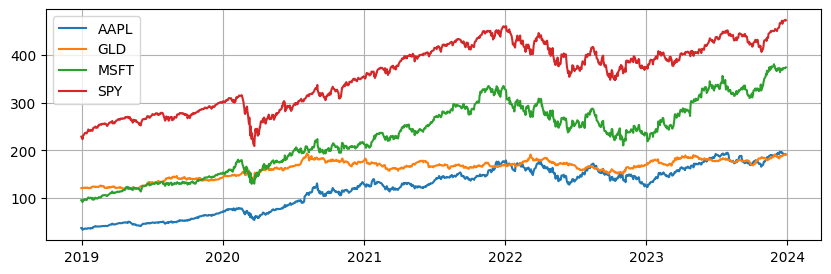

In [55]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,3))
plt.plot(data["AAPL"], label="AAPL")
plt.plot(data["GLD"], label="GLD")
plt.plot(data["MSFT"], label="MSFT")
plt.plot(data["SPY"], label="SPY")
plt.grid(True)
plt.legend()
plt.show()

## 6.  Rentabilidad y su distribución

Rentabilidad aritmética (cambio porcentual). Esta es la rentabilidad que se utiliza en los informes.

In [56]:
rentabilidad = data.pct_change()
rentabilidad

Ticker,AAPL,GLD,MSFT,SPY
Date,,,,
2018-12-31,NaN,NaN,NaN,NaN
2019-01-02,0.001141,0.000660,-0.004431,0.001040
2019-01-03,-0.099607,0.009066,-0.036788,-0.023863
2019-01-04,0.042690,-0.008086,0.046509,0.033496
2019-01-07,-0.002226,0.003458,0.001275,0.007885
...,...,...,...,...
2023-12-22,-0.005547,0.004434,0.002784,0.002010
2023-12-26,-0.002841,0.007621,0.000214,0.004223
2023-12-27,0.000518,0.004538,-0.001575,0.001808


Lo normal sería ahora rellenar los `NaN` con ceros.

In [57]:
rentabilidad = data.pct_change().fillna(0)
rentabilidad

Ticker,AAPL,GLD,MSFT,SPY
Date,,,,
2018-12-31,0.000000,0.000000,0.000000,0.000000
2019-01-02,0.001141,0.000660,-0.004431,0.001040
2019-01-03,-0.099607,0.009066,-0.036788,-0.023863
2019-01-04,0.042690,-0.008086,0.046509,0.033496
2019-01-07,-0.002226,0.003458,0.001275,0.007885
...,...,...,...,...
2023-12-22,-0.005547,0.004434,0.002784,0.002010
2023-12-26,-0.002841,0.007621,0.000214,0.004223
2023-12-27,0.000518,0.004538,-0.001575,0.001808


Graficamos las series de rentabilidades aritméticas de Apple y S&P500.

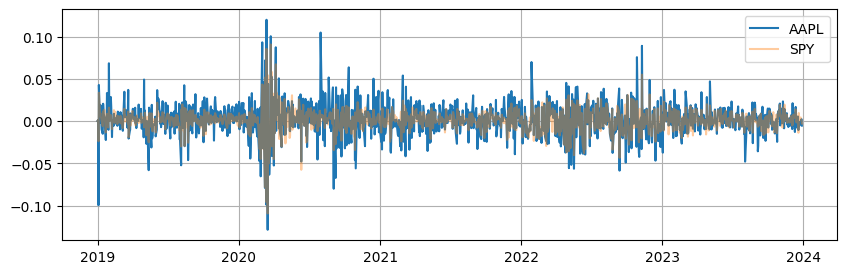

In [58]:
plt.figure(figsize=(10,3))
plt.plot(rentabilidad["AAPL"], label="AAPL")
plt.plot(rentabilidad["SPY"], label="SPY", alpha=0.4)
plt.grid(True)
plt.legend()
plt.show()

¿Cómo devolvemos una serie de rentabilidades aritméticas a la serie de precios original?

$$r_{d+1}=\frac{p_{d+1}-p_{d}}{p_{d}}$$

$$r_{d+1}=\frac{p_{d+1}}{p_{d}}-1$$

$$p_{d+1} = p_{d} \times (1+r_{d+1})$$

In [59]:
precios_revertidos = rentabilidad + 1
precios_revertidos.iloc[0] = precios_revertidos.iloc[0] * data.iloc[0]
precios_revertidos = precios_revertidos.cumprod()
precios_revertidos

Ticker,AAPL,GLD,MSFT,SPY
Date,,,,
2018-12-31,37.707054,121.250000,95.926338,228.866104
2019-01-02,37.750084,121.330002,95.501328,229.104218
2019-01-03,33.989895,122.430000,91.988014,223.637115
2019-01-04,35.440910,121.440002,96.266319,231.128052
2019-01-07,35.362022,121.860001,96.389099,232.950424
...,...,...,...,...
2023-12-22,192.868149,190.270004,372.543915,470.664490
2023-12-26,192.320206,191.720001,372.623505,472.651886
2023-12-27,192.419830,192.589996,372.036713,473.506470


Rentabilidad logarítmica. Es la rentabilidad que se utiliza para realizar análisis de la rentabilidad.

Ref.: https://quantivity.wordpress.com/2011/02/21/why-log-returns/

Las razones más importantes son:
* Cuando la variación en precio es pequeña, los retornos logarítmicos son muy similares a los retornos aritméticos.
* $log(\frac{p_{d+1}}{p_{d}})$ sigue una distribución normal.
* $log(\frac{p_{d+1}}{p_{d}})=log(p_{d+1})-log(p_{d})$
* La suma es numéricamente más estable que la multiplicación cuando los números son muy pequeños.

In [60]:
import numpy as np

rentabilidad_log = np.log(data).diff().fillna(0)
rentabilidad_log

Ticker,AAPL,GLD,MSFT,SPY
Date,,,,
2018-12-31,0.000000,0.000000,0.000000,0.000000
2019-01-02,0.001141,0.000660,-0.004440,0.001040
2019-01-03,-0.104924,0.009025,-0.037482,-0.024152
2019-01-04,0.041804,-0.008119,0.045460,0.032947
2019-01-07,-0.002228,0.003453,0.001275,0.007854
...,...,...,...,...
2023-12-22,-0.005563,0.004425,0.002780,0.002008
2023-12-26,-0.002845,0.007592,0.000214,0.004214
2023-12-27,0.000518,0.004528,-0.001576,0.001806


Si comparamos la rentabilidad aritmética con la logarítmica.

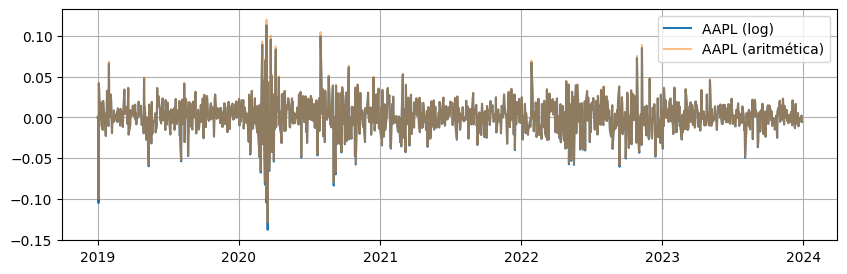

In [78]:
plt.figure(figsize=(10, 3))
plt.plot(rentabilidad_log["AAPL"], label="AAPL (log)")
plt.plot(rentabilidad["AAPL"], label="AAPL (aritmética)", alpha=0.5)
plt.grid(True)
plt.legend()
plt.show()

In [79]:
rentabilidad["AAPL"] - rentabilidad_log["AAPL"]

Date
2018-12-31    0.000000e+00
2019-01-02    6.506217e-07
2019-01-03    5.316959e-03
2019-01-04    8.860516e-04
2019-01-07    2.481494e-06
                  ...     
2023-12-22    1.544404e-05
2023-12-26    4.043018e-06
2023-12-27    1.340592e-07
2023-12-28    2.474519e-06
2023-12-29    1.476391e-05
Name: AAPL, Length: 1259, dtype: float64

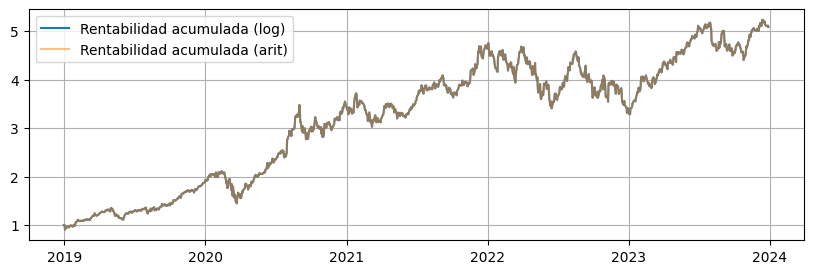

In [80]:
rentabilidad_acum_log = np.exp(rentabilidad_log["AAPL"].cumsum())
rentabilidad_acum_arit = (1 + rentabilidad["AAPL"]).cumprod()

plt.figure(figsize=(10, 3))
plt.plot(rentabilidad_acum_log, label="Rentabilidad acumulada (log)")
plt.plot(rentabilidad_acum_arit, label="Rentabilidad acumulada (arit)", alpha=0.5)
plt.grid(True)
plt.legend()
plt.show()

Si graficamos la diferencia entre ambas rentabilidades...

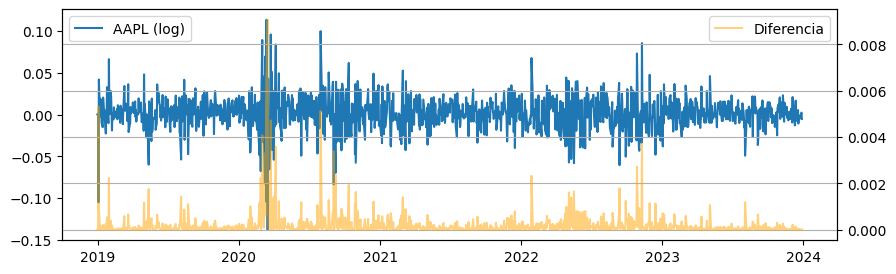

In [81]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 3))
ax.plot(rentabilidad_log["AAPL"], label="AAPL (log)")
plt.legend(loc="upper left")

ax2 = ax.twinx()
ax2.plot(rentabilidad["AAPL"] - rentabilidad_log["AAPL"], label="Diferencia", color="orange", alpha=0.5)
plt.legend(loc="upper right")

plt.grid(True)
plt.show()

Ahora veamos cuál es la distribución de los retornos de un activo.

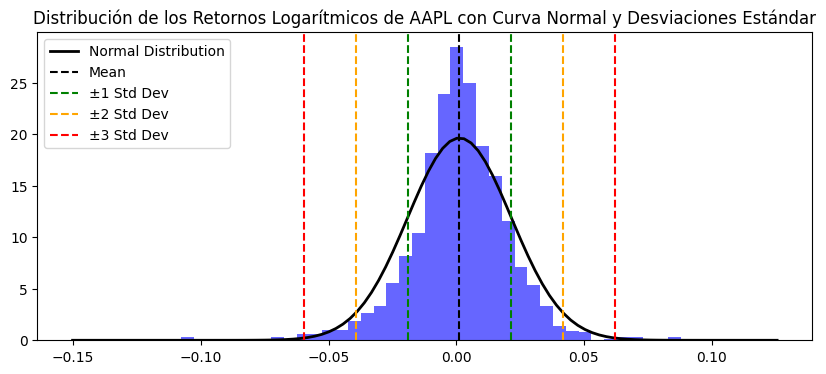

In [64]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# Calculamos la desviación estándar y la media de los retornos
sigma_aapl = rentabilidad_log["AAPL"].std()
mean_aapl = rentabilidad_log["AAPL"].mean()

# Graficamos la distribución, la media y 1, 2 y 3 sigmas
plt.figure(figsize=(10, 4))
# Histograma de la rentabilidad logarítmica
plt.hist(rentabilidad_log["AAPL"], bins=50, density=True, alpha=0.6, color='b')

# Curva de distribución normal
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mean_aapl, sigma_aapl)
plt.plot(x, p, 'k', linewidth=2, label='Normal Distribution')

# Media
plt.axvline(mean_aapl, color="black", linestyle="--", label='Mean')

# +- 1 sigma
plt.axvline(mean_aapl + 1 * sigma_aapl, color="green", linestyle="--", label='±1 Std Dev')
plt.axvline(mean_aapl - 1 * sigma_aapl, color="green", linestyle="--")

# +- 2 sigma
plt.axvline(mean_aapl + 2 * sigma_aapl, color="orange", linestyle="--", label='±2 Std Dev')
plt.axvline(mean_aapl - 2 * sigma_aapl, color="orange", linestyle="--")

# +- 3 sigma
plt.axvline(mean_aapl + 3 * sigma_aapl, color="red", linestyle="--", label='±3 Std Dev')
plt.axvline(mean_aapl - 3 * sigma_aapl, color="red", linestyle="--")

# añadimos el título
plt.title('Distribución de los Retornos Logarítmicos de AAPL con Curva Normal y Desviaciones Estándar')

# Añadimos la leyenda
plt.legend(loc='upper left')

plt.show()


Viendo la figura, aparentemente sigue una distribución Normal (Gaussiana). Entonces, podemos caracterizar los datos mediante su media y su desviación estándar:

1. Se calcula la rentabilidad media de los retornos:

$$\bar{r} = \frac{1}{n} \sum_{i=1}^n r_i$$

2. Se calcula la varianza de los retornos:

$$\sigma^2 = \frac{1}{n-1} \sum_{i=1}^{n} (r_i - \bar{r})^2$$

3. Se calcula la desviación típica de los retornos:

$$\sigma = \sqrt{\frac{1}{n-1} \sum_{i=1}^{n} (r_i - \bar{r})^2}$$

La rentabilidad, varianza y desviación típica **siempre se expresa en términos anuales**:

- Si los datos son diarios, consideramos que hay 252 días al año de negociación.
- Si los datos son mensuales, consideramos que hay 12 meses al año.

In [83]:
print(f'Rentabilidad media anualizada: {rentabilidad_log["AAPL"].mean() * 252:.4f}')
print(f'Varianza anualizada: {rentabilidad_log["AAPL"].var() * 252:.4f}')
print(f'Desviación estándar anualizada: {rentabilidad_log["AAPL"].std() * np.sqrt(252):.4f}')

Rentabilidad media anualizada: 0.3256
Varianza anualizada: 0.1038
Desviación estándar anualizada: 0.3222


# Ejercicio de Repaso: Visualización de Distribuciones de Retornos y Comparación de Volatilidades

## Objetivos:
1. Visualizar la distribución de los retornos logarítmicos de varios activos financieros.
2. Comparar las volatilidades de los activos en un periodo anualizado.

## Instrucciones:

### Parte 1: Descarga y Cálculo de Rentabilidades
1. **Descargar los datos:** 
   - Utiliza `yfinance` para descargar los precios de cierre ajustados (`Adj Close`) de los siguientes activos para el periodo del 1 de enero de 2022 al 31 de diciembre de 2023:
     - Apple Inc. (AAPL)
     - Microsoft Corporation (MSFT)
     - SPDR Gold Trust ETF (0KZF.L)
   
2. **Calcular las rentabilidades logarítmicas:** 
   - Calcula las rentabilidades logarítmicas diarias para cada activo y agrégalas a un DataFrame.

3. **Calcular Rentabilidad y Volatilidad Anualizada:**
   - Calcula la rentabilidad y la volatilidad anualizada para cada activo usando las rentabilidades logarítmicas diarias.

### Parte 2: Visualización de las Distribuciones de Retornos
4. **Graficar las distribuciones:** 
   - Para cada activo, crea un histograma que muestre la distribución de las rentabilidades logarítmicas.
   - Superpone una curva de distribución normal basada en la media y la desviación estándar de las rentabilidades calculadas para cada activo.
   - En un solo gráfico, añade los histogramas de los tres activos para comparar visualmente sus distribuciones.
   - Añade una leyenda que indique a qué activo corresponde cada distribución.

### Parte 3: Comparación de Volatilidades
5. **Calcular y Comparar las Volatilidades:** 
   - Calcula la volatilidad anualizada de las rentabilidades logarítmicas para cada activo.
   - Añade una anotación en el gráfico que indique la volatilidad anualizada de cada activo.
   - Ajusta los ejes y añade un título al gráfico, como "Comparación de las Distribuciones de Retornos y Volatilidades Anualizadas de AAPL, MSFT, y SPDR Gold Trust".

### Parte 4: Interpretación
6. **Análisis de los Resultados:** 
   - Responde a las siguientes preguntas:
     1. ¿Qué activo presenta la mayor volatilidad anualizada?
     2. ¿Las distribuciones de los retornos difieren significativamente entre los activos?
     3. ¿Qué observaciones puedes hacer acerca de los riesgos relativos de estos activos basándote en sus distribuciones y volatilidades anualizadas?

## Resultado Esperado:
Al completar este ejercicio, deberías ser capaz de visualizar las distribuciones de los retornos logarítmicos, comparar las volatilidades anualizadas entre diferentes activos financieros, y obtener una comprensión más profunda de los riesgos asociados con cada activo.
